<a href="https://colab.research.google.com/github/sam-h-bean/imdb-goof/blob/master/lstm_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb Sentiment Analysis Goof

## Install extra dependencies on colab

In [1]:
!pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.50.0-cp37-none-any.whl size=19416 sha256=87d5a6e140429bf293fce709b6f751c2f6a15e3b139c42292d71dc7c4b88e64f
  Stored in directory: /root/.cache/pip/wheels/29/93/0d/891573db60f74d0e43bd7db1496c3ef898f8b5946a4c24cbda
Successfully built keras-self-attention


## Import dependencies

In [25]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Layer, Dense, Embedding, LSTM, Bidirectional

from keras import backend as K
from keras_self_attention import SeqSelfAttention

import matplotlib.pyplot as plt

## Load the dataset

In [3]:
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Define and train the model

In [31]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, dropout=0.5, return_sequences=True)))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
bidirectional_7 (Bidirection (None, None, 64)          16640     
_________________________________________________________________
peel_the_layer_1 (peel_the_l (None, 64)                564       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 337,269
Trainable params: 337,269
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
157/157 [==============================] - 13s 59ms/step - loss: 0.6380 - acc: 0.6059 - val_loss: 0.4730 - val_acc: 0.8166
Epoch 2/10
157/157 [==============================] - 8s 53ms/step - loss: 0.4884 - acc: 0.8039 - val_loss

# Evaluate on test set

In [32]:
scores = model.evaluate(input_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 85.20%


## Plot results

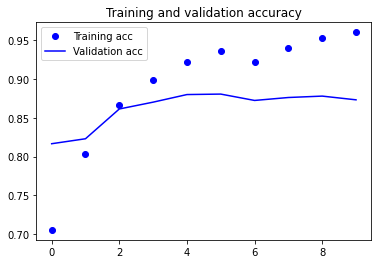

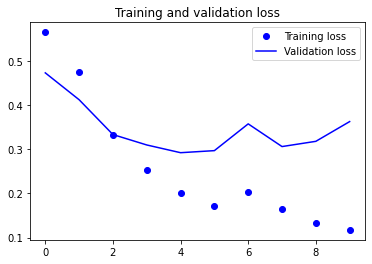

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()